# Q1

Multiplications required are n*k*m : We take row wise multiplications such that every row in the final matrix has n rows and m columns with k multiplications in a single element (row and column specified) thus making the total number of multiplications n*m*k
Additions required are m^n : Every element(row and column specified) in the final matrix consists of n additions and there are n such rows with m elements each - finally resulting in m^n additions

# Q2

In [65]:
%%timeit

M1 = [[10, 20, 30],
     [40, 50, 60]]
M2 = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
Ans = [[0, 0, 0, 0],
      [0, 0, 0, 0]]

for i in range(len(M1)):
    for j in range(len(M2[0])):
        for k in range(len(M2)):
            Ans[i][j] = Ans[i][j] + ( M1[i][k] * M2[k][j] )
            
#for l in Ans:
#    print (l)           

23.9 µs ± 668 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [66]:
%%timeit

import numpy as np

M1 = [[10, 20, 30],
     [40, 50, 60]]
M2 = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
Ans = [[0, 0, 0, 0],
      [0, 0, 0, 0]]

Ans = np.dot(M1,M2)

#for i in Ans:
#    print (i)

31 µs ± 637 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The time taken for lists of lists method and numpy method is seen above. From the above data we can say that, the numpy approach is faster as compared to the list of lists approach. The following may be the reasons for the same:

For lists, the code consists of multiple loops before getting to the loops and thus the time complexity is more compared to the numpy method. 
Since Numpy stores data in a concise way and thus, it works faster compared to the Python lists.
Numpy can separate a single task in such a way that they can process parallely, making it work faster.
Within the Numpy package, the operations make use of codes in C,C++ which require considerably lesser time for execution.

# Q3

In [72]:
# Traversing through the array to sort an then even-odd condition for median
arr = [9,5,18,8,2,20,15]
l = len(arr)

for i in range(l):
    smallest = i
    for j in range(i+1,l):
        if arr[smallest] > arr[j]:
            smallest = j
            
# Get the smallest ele at the start            
    arr[i], arr[smallest] = arr[smallest], arr[i] 

# For array with odd length: index : (n-1)//2
if (l%2==1):
    print (arr[(l-1)//2])

# For array with even length: indices : (n-1)//2 and n//2
else:
    print ((arr[(l-1)//2] + arr[l//2])/2)
    

# time complexity- order l^2 or N^2        

9


In [80]:
%%time
# Using the sorted command which sorts the array in n(log(n)) order - better approach than previous method

def median(a):
    a = sorted(a)
    l = len(a)
    if l % 2 == 1:
        return a[(l-1)//2]
    else:
        return (a[(l-1)//2] + a[l//2]) / 2

arr = [9,5,18,8,2,20,15]
(median(arr))

#The overall time complexity of this code is O(nlog(n)) as the sorted function is O(nlog n).       

Wall time: 0 ns


9

In [74]:
%%time
# Using NumPy 

import numpy
arr = [9,5,18,8,2,20,15]
%time (numpy.median(arr))

Wall time: 31.3 ms
Wall time: 31.3 ms


9.0

# Q4

The gradient of a function can be found out using partial derivatives of the function with respect to the variables. It is in the form of a vector. The gradient for the given function comes out to be as follows:
2xy + (y^3)cos(x) , (x^2) + 3(y^2)sin(x)
where the first part is the derivative wrt x, and the second is the derivative with respect to y.
The same can be written in a vector form with i,j.

# Q5

In [61]:
import jax.numpy as jnp
from jax import grad

def func(x,y):
    return ((x**2)*y) + ((y**3)*(jnp.sin(x)))

gradient = grad(func)(2.0,3.0)
print(gradient)

# code not running in jupyter(requires the jaxlib package, which wasn't working in my case), works in google colab

ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

# Q6

In [31]:
from sympy import *

x,y = symbols('x,y')

f = ((x**2)*y) + ((y**3)*(sympy.sin(x)))

grad = sympy.Matrix([f]).jacobian([x,y])
print(grad)

Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


# Q7

In [55]:
Hierarchy = { '2022': 
             {'Branch 1' : {
                 'Roll Number': '1', 'Name':'N', 'Marks':{
                     'Maths':'100','English':'70'}}},
              'Branch 2': { }}, { 
              '2023': {
                'Branch 1' : {}},
                'Branch 2': { }}, { 
              '2024': {
                'Branch 1' : {}},
                'Branch 2': { }}, { 
              '2025': {
                'Branch 1' : {}},
                'Branch 2': { }}
print(Hierarchy)

({'2022': {'Branch 1': {'Roll Number': '1', 'Name': 'N', 'Marks': {'Maths': '100', 'English': '70'}}}, 'Branch 2': {}}, {'2023': {'Branch 1': {}}, 'Branch 2': {}}, {'2024': {'Branch 1': {}}, 'Branch 2': {}}, {'2025': {'Branch 1': {}}, 'Branch 2': {}})


# Q8

In [81]:
class Year:
  def __init__(self, year, branches):
    self.year=year
    self.branches=branches

class Branch:
  def __init__(self, branch, students):
    self.branch=branch
    self.students=students

class Details:
  def __init__(self, roll_no, name, marks):
    self.roll_no=roll_no
    self.name=name
    self.marks=marks
    
hierarchy = [
    Year(2022,[
        Branch('Branch 1',[
            Details(1, 'N', {'Maths': 100, 'English': 70})
        ]),
        Branch('Branch 2',[
            Details(2, 'M', {'Maths': 100, 'English': 90})
        ])
    ]),
    Year(2023,[
        Branch('Branch 1',[
            Details(1, 'A', {'Maths': 90, 'English': 70})
        ]),
        Branch('Branch 2',[
            Details(2, 'B', {'Maths': 80, 'English': 85})
        ])
    ]),
    Year(2024,[
        Branch('Branch 1',[
            Details(1, 'R', {'Maths': 95, 'English': 70})
        ]),
        Branch('Branch 2',[
            Details(2, 'S', {'Maths': 85, 'English': 60})
        ])
    ]),
    Year(2025,[
        Branch('Branch 1',[
            Details(1, 'X', {'Maths': 70, 'English': 65})
        ]),
        Branch('Branch 2',[
            Details(1, 'Y', {'Maths': 65, 'English': 50})
        ])
    ])
]


# Q9

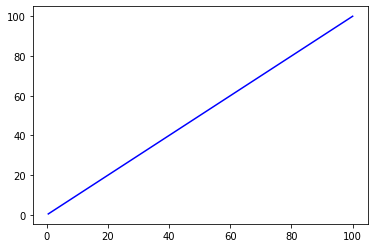

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = x

plt.plot(x,y,'b')
plt.show()


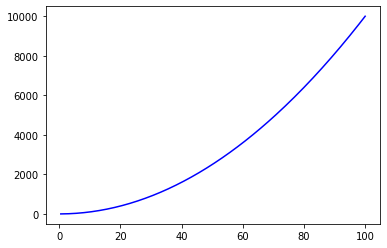

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = x**2

plt.plot(x,y,'b')
plt.show()

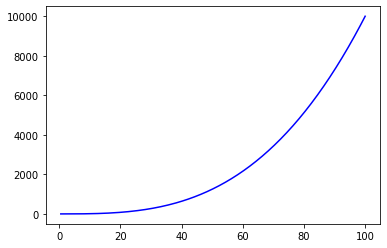

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = (x**3)/100

plt.plot(x,y,'b')
plt.show()

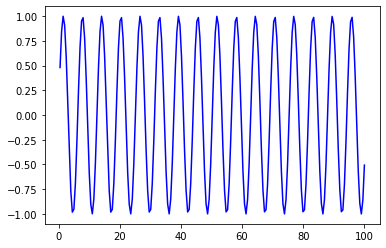

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = np.sin(x)

plt.plot(x,y,'b')
plt.show()

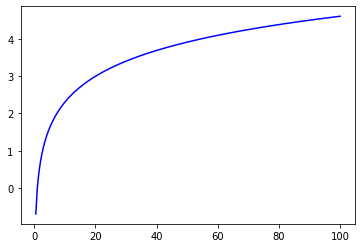

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = np.log(x)

plt.plot(x,y,'b')
plt.show()

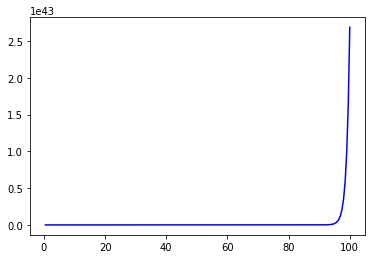

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,100,199)
y = np.exp(x)

plt.plot(x,y,'b')
plt.show()

# Q10

In [75]:
import numpy as np
import pandas as pd

matrix = np.random.randint(low=1, high=3, size=(20, 5))

column_title = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(data = matrix,
                 columns = column_title)

std_dev = df.std(axis = 0)
#print(std_dev)
max_std_dev = std_dev.idxmax()
print("Column showing max std deviation is:",max_std_dev)

mean = df.mean(axis=1)
#print(mean)
lowest_mean = mean.idxmin()
print("Row with the lowest mean is:",lowest_mean)

print(df)

Column showing max std deviation is: d
Row with the lowest mean is: 4
    a  b  c  d  e
0   2  1  2  1  2
1   2  2  2  2  2
2   2  1  1  1  1
3   1  1  2  1  1
4   1  1  1  1  1
5   2  1  2  2  1
6   1  1  1  1  2
7   2  2  2  2  1
8   2  1  2  2  2
9   1  1  2  1  2
10  2  1  2  2  2
11  1  1  2  2  1
12  1  2  1  1  2
13  2  2  1  2  1
14  2  1  1  1  2
15  2  1  2  2  1
16  2  1  1  2  1
17  1  2  1  1  1
18  2  1  2  2  1
19  2  1  2  2  1


# Q11

In [76]:
import numpy as np
import pandas as pd

matrix = np.random.randint(low=1, high=3, size=(20, 5))

column_title = ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(data = matrix,
                 columns = column_title)

std_dev = df.std(axis = 0)
#print(std_dev)
max_std_dev = std_dev.idxmax()
#print("Column showing max std deviation is:",max_std_dev)

mean = df.mean(axis=1)
#print(mean)
lowest_mean = mean.idxmin()
#print("Row with the lowest mean is:",lowest_mean)

df['f']=df['a'] + df['b'] + df['c'] + df['d'] + df['e'] 

df['g'] = df['f'].apply(lambda i: 'LT8' if i<8 else 'GT8')

freq = df.query("g=='LT8'").shape[0]
print("No. of rows with g column having LT8 is:",freq)

std_dev_lt8 = df.query("g == 'LT8'")['f'].std()
print("Std dev of col f such that g col shows LT8:",std_dev_lt8)

std_dev_gt8 = df.query("g == 'GT8'")['f'].std()
print("Std dev of col f such that g col shows GT8:",std_dev_gt8)

print(df)

No. of rows with g column having LT8 is: 11
Std dev of col f such that g col shows LT8: 0.5222329678670935
Std dev of col f such that g col shows GT8: 0.7264831572567788
    a  b  c  d  e   f    g
0   2  2  1  2  1   8  GT8
1   2  2  1  2  2   9  GT8
2   1  1  2  1  2   7  LT8
3   1  2  1  1  1   6  LT8
4   1  1  2  1  1   6  LT8
5   2  1  2  2  1   8  GT8
6   1  1  1  1  2   6  LT8
7   2  1  2  2  1   8  GT8
8   1  1  2  2  2   8  GT8
9   1  1  2  1  2   7  LT8
10  1  1  2  1  1   6  LT8
11  2  2  2  1  1   8  GT8
12  2  2  1  2  2   9  GT8
13  1  2  1  1  1   6  LT8
14  2  2  2  1  2   9  GT8
15  1  1  2  1  2   7  LT8
16  2  1  2  1  1   7  LT8
17  1  1  1  1  2   6  LT8
18  1  1  2  2  1   7  LT8
19  2  2  2  2  2  10  GT8


# Q12

Broadcasting in numpy is mainly used for making arrays' shapes compatible.
It works in a way that the smaller array is broadcast such that it matches the shape of the larger one for necessary operations.
Just like we perform matrix addition on an element-element basis, where we require the matrics to have the same shape, numpy also requires the arrays to have same shapes to perform the operations - which is why broadcasting is useful.

As we will see in the example, it can be used to multiply a scalar quantity to an array, by simply broadcasting the scalar quantity across the larger array. 

In [83]:
arr = np.array([1,2,3])
scalar = 4
c = arr * scalar

print(c)

[ 4  8 12]


# Q13

In [84]:
# Argmin fuction

def calculate_argmin(M):
    M = np.array(M)
    M1 = M.flatten()
    l = len(M1)
    smallest = M1[0]
    a = 0
    for i in range(l):
        if smallest > M1[i]:
            smallest = M1[i]
            a = i   
    return a

M = [[5,7], 
     [6,8],
     [9,4]]
print(calculate_argmin(M))

# Verifying the solution

small = np.argmin(M)
print(small)

5
5
